In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


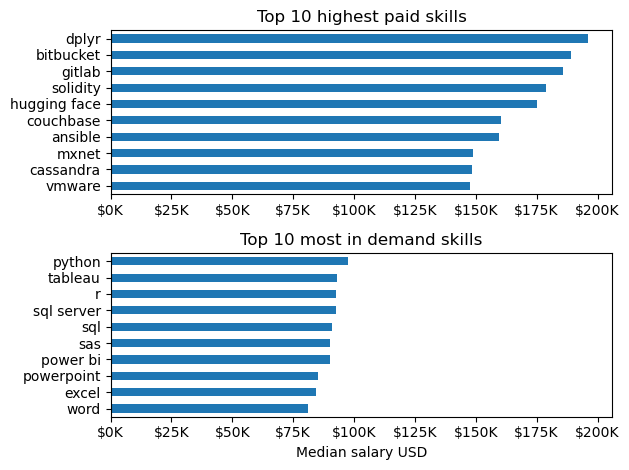

In [2]:
import seaborn as sns

df_da_eu = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_da_eu.dropna(subset=['salary_year_avg'])

df_da_eu = df_da_eu.explode('job_skills')

df_da_eu_group = df_da_eu.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_top_pay = df_da_eu_group.sort_values(by='median',ascending=False).head(10)
df_da_skills = df_da_eu_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False) #sort twice for the median also

fig, ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # [::-1] == ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 most in demand skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

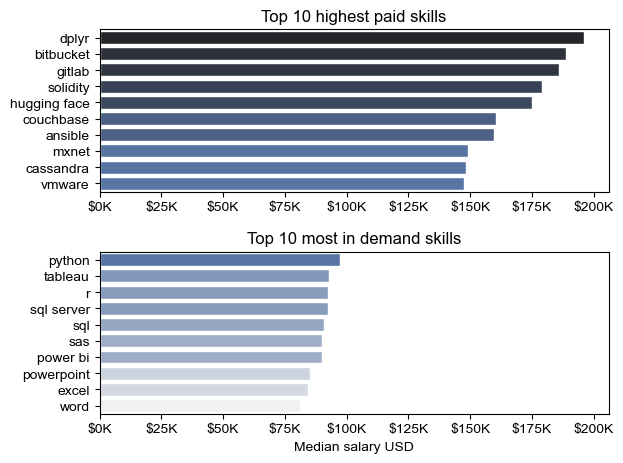

In [7]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

#df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # [::-1] == ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)
#df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 most in demand skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

Histograms

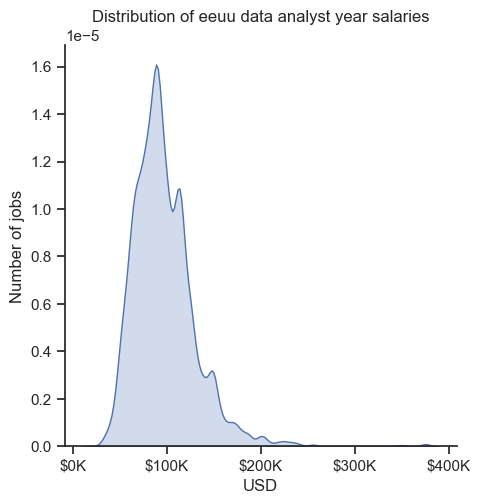

In [15]:
sns.set_theme(style='ticks')
sns.displot(df_da_eu['salary_year_avg'], kind='kde', fill=True)

ax = plt.gca()
plt.title('Distribution of eeuu data analyst year salaries')
plt.xlabel('USD')
plt.ylabel('Number of jobs')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

BoxPlots

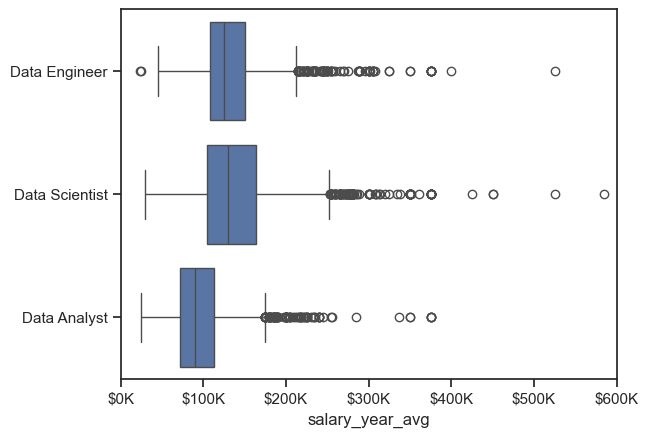

In [18]:
import seaborn as sns

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) &    (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset='salary_year_avg')

job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')
#plt.boxplot(job_list, labels=job_titles , vert=False) 

ax = plt.gca() #get corrunt axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.ylabel('')
plt.show()